# Computational Mechanics Sheet Q5

In [87]:
# Importing useful libraries, setting plot styles
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm # For colourful contour plots

plt.rcParams['text.usetex'] = True # Plots have LaTeX
plt.style.use('seaborn-v0_8-whitegrid') # Plots look better (in my opinion)

We have a frame $S'$ moving at a speed $v$ along the $x$-axis, as measured in a frame $S$. We can construct the Lorentz transformation matrix to relate the space-time coordinates $(x, y, z, t)$ in the frame $S$ to the coordinates $(x', y', z', t')$ in $S'$. I'm going to choose units such that the speed of light $c = 1$. The first useful definition is:
$$\gamma \equiv \frac{1}{\sqrt{1 - v^2}}$$
This give the form of the Lorentz transformations:
$$x = \gamma (x' + v t')$$
$$y = y'$$
$$z = z'$$
$$t = \gamma (t' + vx')$$
Which may be represented as:
$$\begin{pmatrix} x \\ y \\ z \\ t\end{pmatrix} =
 \begin{pmatrix} \gamma & 0 & 0 & \gamma v \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ \gamma v & 0 & 0 & \gamma \end{pmatrix} 
 \begin{pmatrix} x' \\ y' \\ z' \\ t'\end{pmatrix}

I now want to initialise a list of light ray vectors in $S'$ frame. I'll keep these in the $(x', y')$ plane for now. I'm going to generate these spaced over time intervals of $\Delta t' = 1$ unit. Note that in this time, each ray has extended $1$ length unit. Firstly, generate a set of $\theta$ values, where $\theta$ represents the angle between the ray and the $x'$ axis.

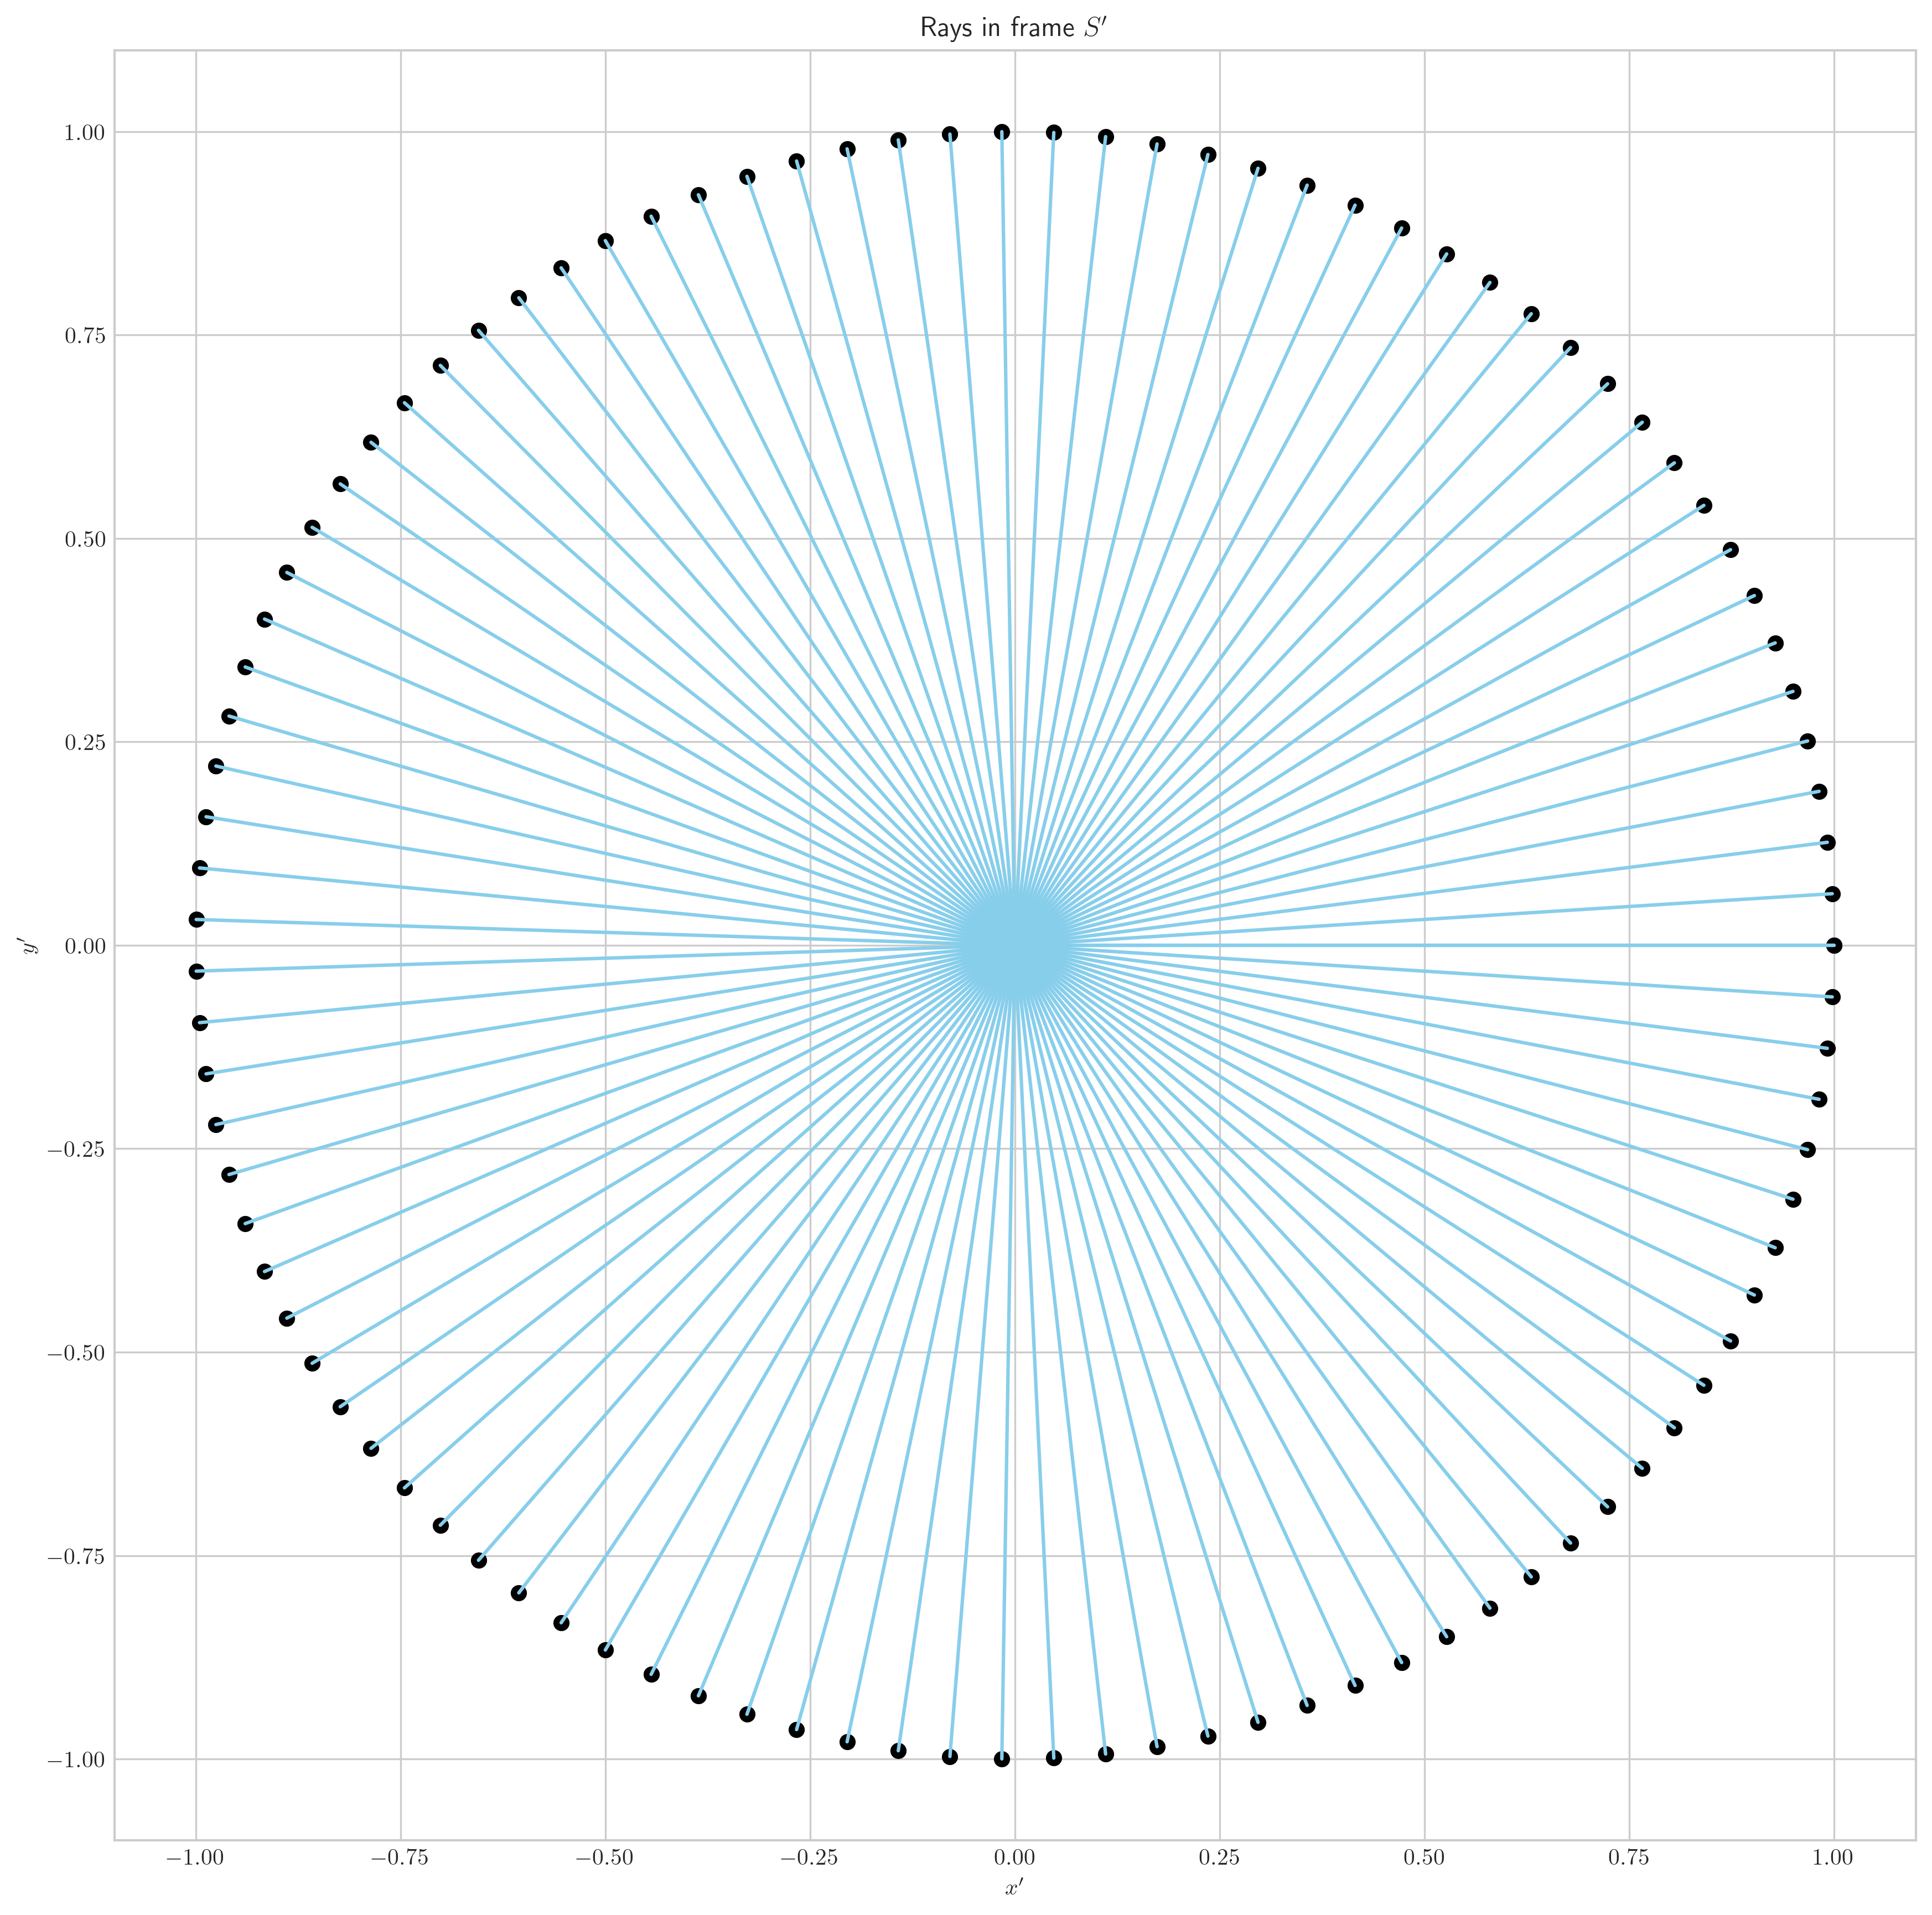

In [88]:
# Plot parameters
fig = plt.figure(figsize=(14, 14), dpi=300)
plt.title('Rays in frame $S\'$')
plt.xlabel('$x\'$')
plt.ylabel('$y\'$')

# Initialise vector of theta values
R = 100 # Number of theta values
theta = np.linspace(0, 2 * np.pi, R)

# A first ray point a distance 0.1 units from the origin
initial_rays = np.array([np.cos(theta), np.sin(theta), np.ones((R))])

# Checking that this is an array of 100 neighbouring 2-vectors using the shape property
# Comment back in if needed
# np.shape(initial_rays)

# Extending the rays to a length of 20
N = 2 # Number of time values
rays = np.zeros((3, R, N))
for i in range(N):
    rays[:, :, i] = (i) * initial_rays

# Plotting. Can comment out if using larger R, N values such that the plot becomes practically useless
for i in range(R):
    plt.scatter(rays[0, i, :], rays[1, i, :], color='k')
    plt.plot([rays[0, i, 0], rays[0, i, -1]], [rays[1, i, 0], rays[1, i, -1]], color='skyblue' )



It looks as though the points in the figure above seem to form circularly symmetric rays, which is exactly what I wanted. Now, to move into the frame $S$. The key ray structure here is a 3-D array. The third dimension index represents the $t'$ value for the rays. The 2-D array associated with each time is formed of a set of neighbouring column 3-vectors. Now, I can just apply the first two of the Lorentz transformations documented earlier.

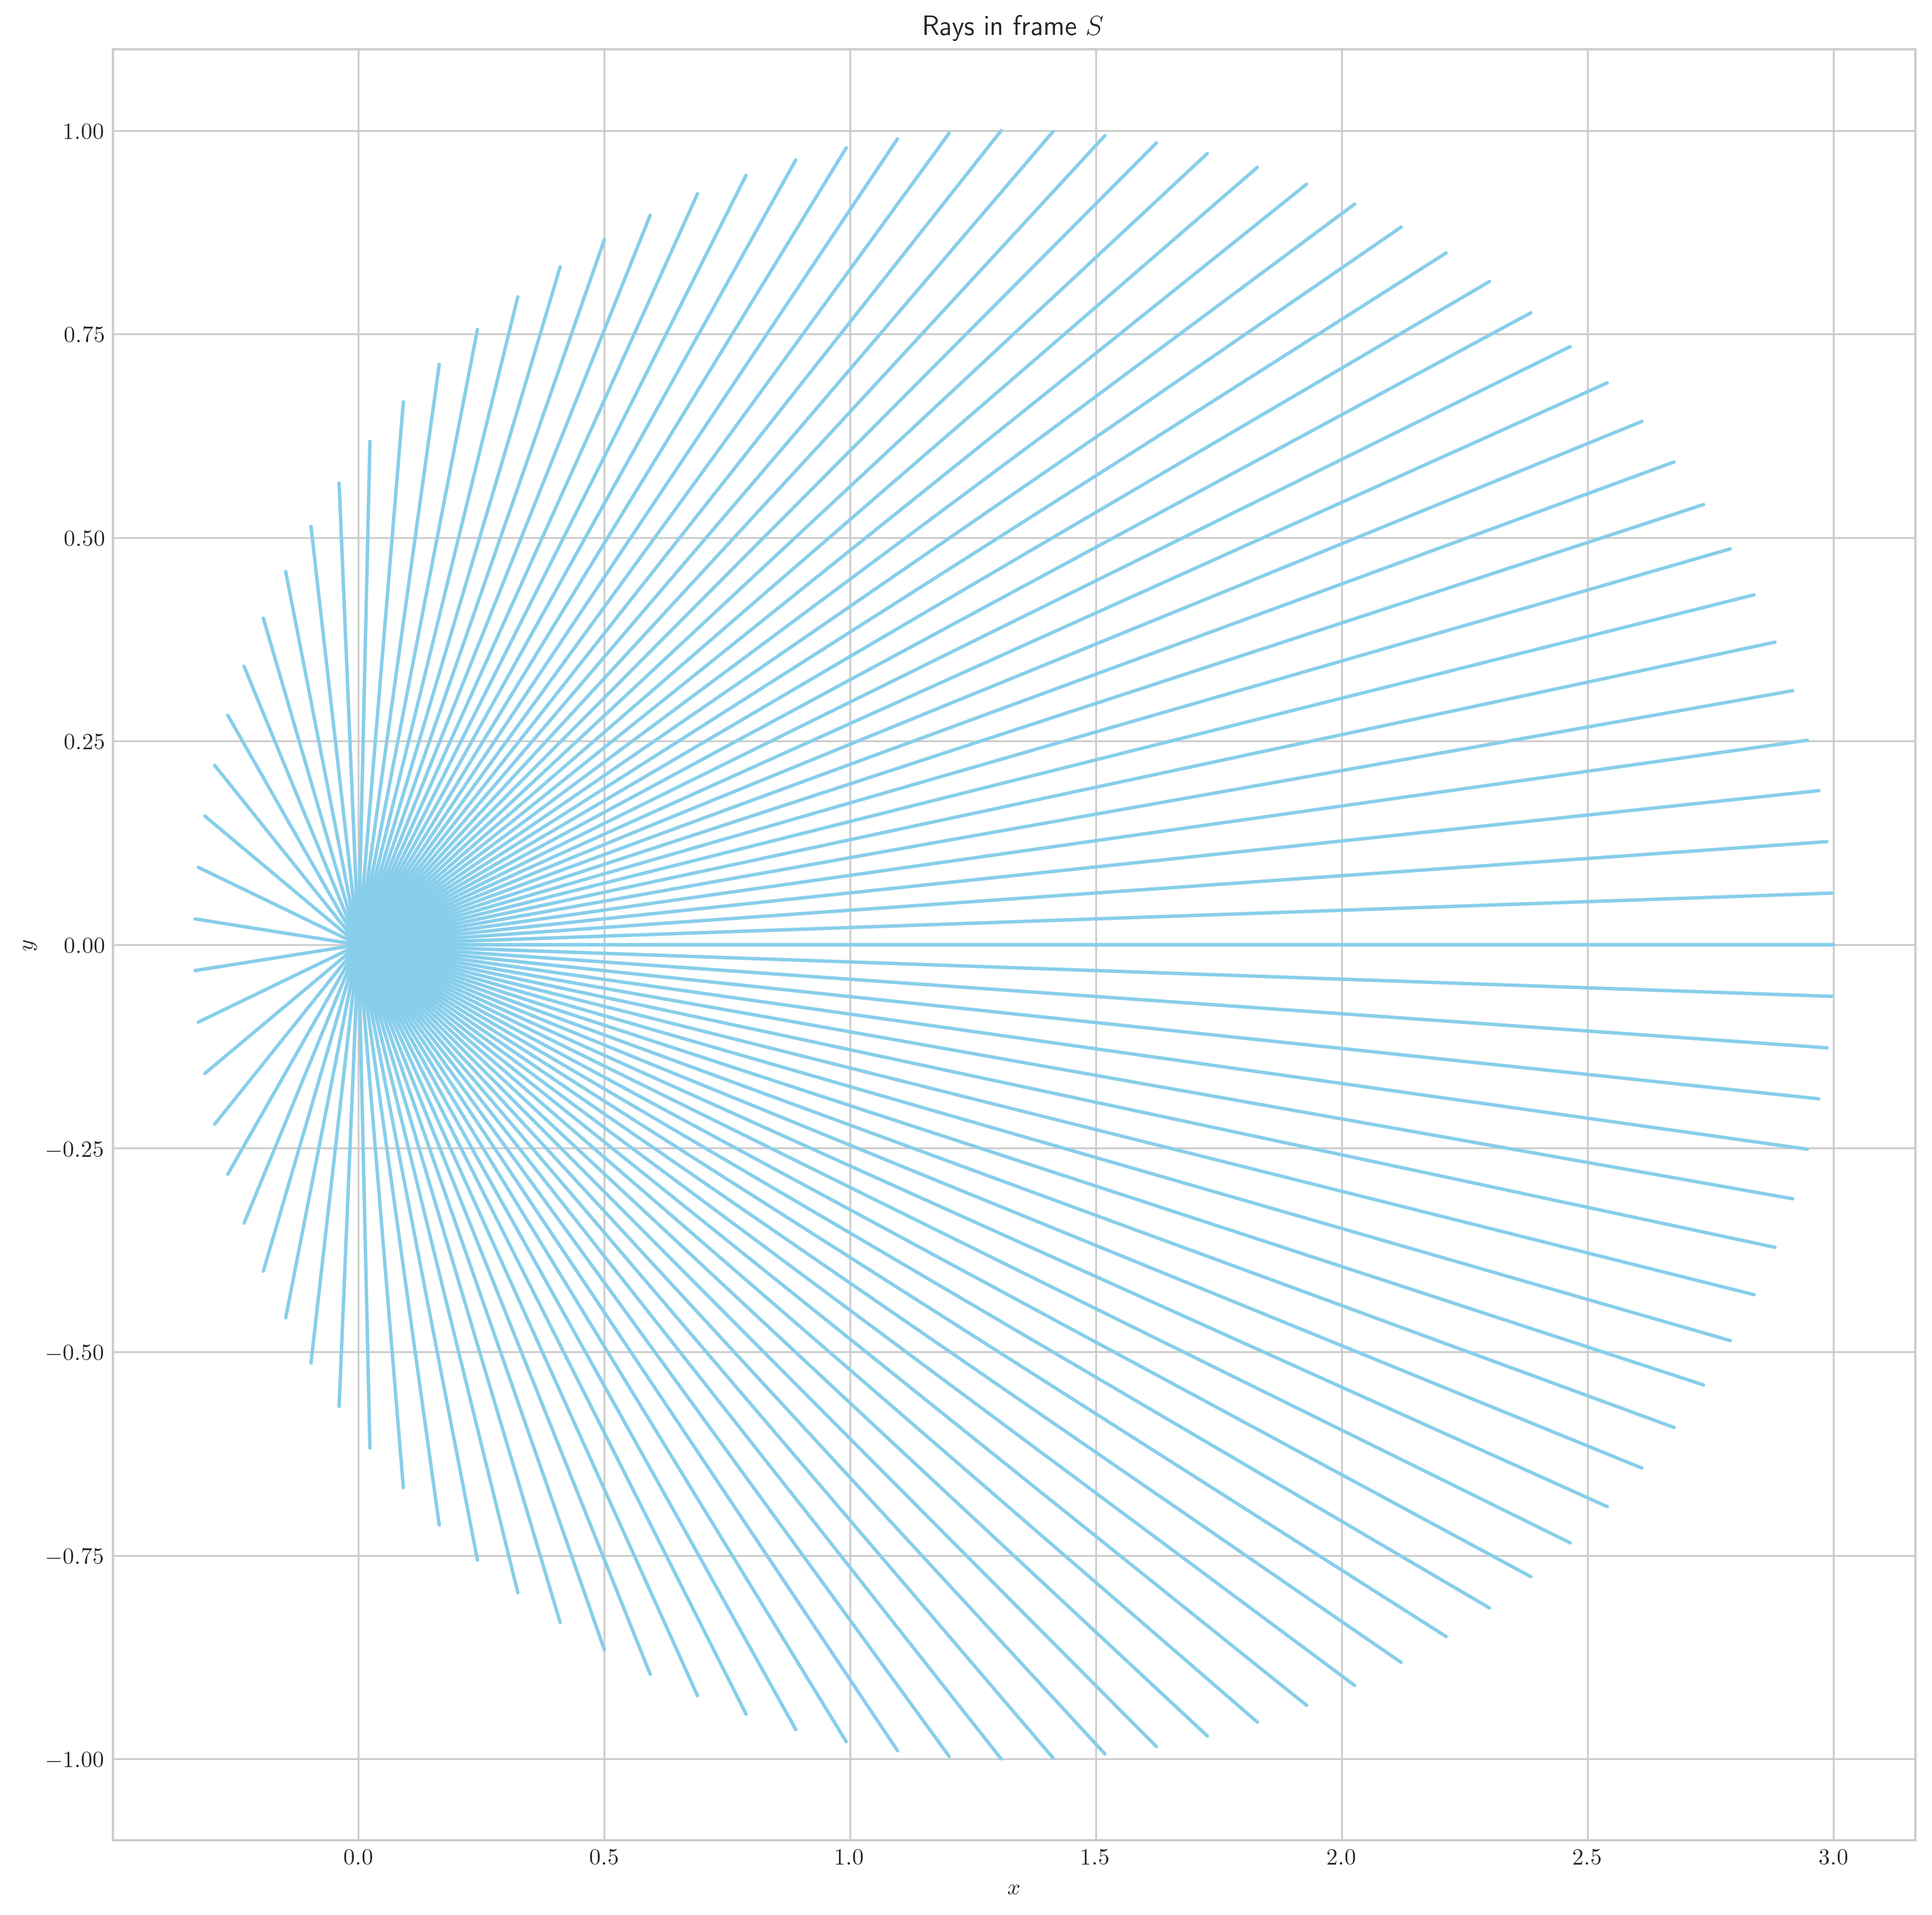

In [89]:
# Defining speed of frame S', and associated gamma value
v = 0.8
gamma = 1/np.sqrt(1 - v * v)

# NEW Plot parameters
# Note that we want axis limits to be same to compare effects
fig = plt.figure(figsize=(14, 14), dpi=300)
plt.title('Rays in frame $S$')
plt.xlabel('$x$')
plt.ylabel('$y$')

# Storing the required Lorentz transformations from earlier in a matrix
lorentz = np.array([[gamma, 0, gamma * v], [0, 1, 0], [gamma * v, 0, gamma]])

rays2 = np.copy(rays)

for i in range(N):
    rays2[:, :, i] = np.matmul(lorentz, rays[:, :, i])

for i in range(R):
    plt.plot(rays2[0, i, :], rays2[1, i, :], color='skyblue')



Ok, so that was obviously pretty poorly written, but it does the job I guess (maybe idek if its right). Notice that we only really need one $t$ value, since the rays appear to followa straight line in both frames. It